In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/drive/MyDrive/ML_Results/preprocessed.csv")

X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 3,activation='relu'))
ann.add(tf.keras.layers.Dense(units = 5,activation='relu'))
ann.add(tf.keras.layers.Dense(units = 1,activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
history = ann.fit(X_train, y_train, epochs=30, batch_size=32, validation_split = 0.2)

loss, acc = ann.evaluate(X_test,y_test)

print("Loss: ", loss)
print("Accuracy: ", acc)

Epoch 1/30
40/40 [==============================] - 1s 5ms/step - loss: 0.2128 - accuracy: 0.8527 - val_loss: 0.1950 - val_accuracy: 0.8683
Epoch 2/30
40/40 [==============================] - 0s 2ms/step - loss: 0.1938 - accuracy: 0.8527 - val_loss: 0.1777 - val_accuracy: 0.8683
Epoch 3/30
40/40 [==============================] - 0s 3ms/step - loss: 0.1770 - accuracy: 0.8527 - val_loss: 0.1620 - val_accuracy: 0.8683
Epoch 4/30
40/40 [==============================] - 0s 3ms/step - loss: 0.1616 - accuracy: 0.8527 - val_loss: 0.1480 - val_accuracy: 0.8683
Epoch 5/30
40/40 [==============================] - 0s 3ms/step - loss: 0.1476 - accuracy: 0.8527 - val_loss: 0.1348 - val_accuracy: 0.8683
Epoch 6/30
40/40 [==============================] - 0s 2ms/step - loss: 0.1344 - accuracy: 0.8527 - val_loss: 0.1224 - val_accuracy: 0.8683
Epoch 7/30
40/40 [==============================] - 0s 2ms/step - loss: 0.1221 - accuracy: 0.8527 - val_loss: 0.1109 - val_accuracy: 0.8683
Epoch 8/30
40/40 [==

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, roc_auc_score

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
print("Classification report for classifier %s:\n%s\n" % (
    ann, classification_report(y_test, y_pred)))


Classification report for classifier <keras.engine.sequential.Sequential object at 0x7f04003ff490>:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       346
           1       1.00      0.79      0.88        53

    accuracy                           0.97       399
   macro avg       0.98      0.90      0.93       399
weighted avg       0.97      0.97      0.97       399




In [ ]:
################# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
print(cm)

################ Accuracy
print()
print("Model accuracy: ", accuracy_score(y_test, y_pred))

Confusion matrix
[[346   0]
 [ 11  42]]

Model accuracy:  0.9724310776942355


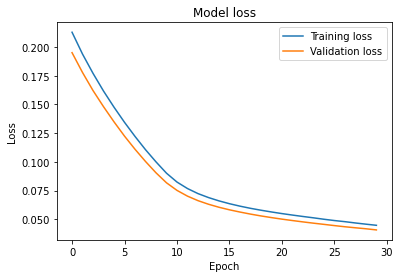

In [ ]:
################### Loss Curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

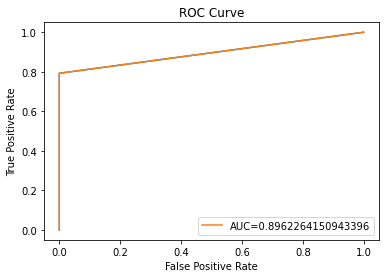

In [ ]:
################## ROC Curve
y_pred = y_pred.ravel()
fpr, tpr, _ = roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
import pickle
fileName = "/content/drive/MyDrive/ML_Results_Main/ANN_Numeric_97.model"
pickle.dump(ann, open(fileName, 'wb'))

INFO:tensorflow:Assets written to: ram://ec106bc8-90ad-4322-b5cb-8db07b44a470/assets
